## Задание №2. Проверка статистических гипотез 

Веберите любые данные из репозитория данных для машинного обучения (UCI Machine learning repository: http://archive.ics.uci.edu/ml/index.php) или возьмите свои данные и проверьте для них различные статистические гипотезы в соответствии со следующей схемой. Комментарии к каждому разделу обязательны. Возможно применения разных наборов данных для проверки разных гипотез.

*Выполнил:* Бронников Егор ПМ-1901

*Последнее изменение:* 28/10/2021

### Импорты

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import *
from statsmodels.stats.descriptivestats import sign_test

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Проверка гипотезы о нормальности распределения признаков (критерий Шапиро-Уилка, графический метод, метод на основе ассиметрии и эксцесса)

### Данные

*Источник:* https://data.4tu.nl/articles/dataset/Results_of_Empathy_and_Resilience_questionnaire-_before_and_after_the_medical_humanities_programme/12705704

*Название:* **Results of Empathy and Resilience questionnaire- before and after the medical humanities programme**

#### Описание данных

23 студента-медика прошли обучение по программе медицинских гуманитарных наук в течение года и заполнили анкеты сочувствия и устойчивости до и после курса. Их сравнивали с контрольной группой из 18 студентов, которые не участвовали в программе обучения гуманитарным наукам и которые также заполнили анкету сочувствия и устойчивости в начале и в конце года. 

### Гипотеза

$H_0$ $-$ параметры `Adaptability` и `SelfControl` распредлены нормально
 
$H_1$ $-$ не нормально

В связи стем что параметров оценки устойчивости оказалось много, то в соответствии с выбранной нами гипотезой мы проверим некоторые из них, такие как: `Adaptability` и `SelfControl`.

In [3]:
dfBefore = pd.read_excel('./data/data.xlsx', sheet_name="ResilienceExptGrpBefore")
dfAfter = pd.read_excel('./data/data.xlsx', sheet_name="ResilienceExptGrpAfter")

In [4]:
dfAdaptability = pd.DataFrame({"Before": dfBefore["Adaptability"], "After": dfAfter["Adaptability"]})
dfAdaptability.head()

,Before,After
0,37,37
1,43,43
2,36,38
3,36,37
4,31,31


In [5]:
dfSelfControl = pd.DataFrame({"Before": dfBefore["SelfControl"], "After": dfAfter["SelfControl"]})
dfSelfControl.head()

,Before,After
0,33,33
1,33,36
2,21,23
3,41,41
4,22,31


In [6]:
n = len(dfBefore)

### Графический метод

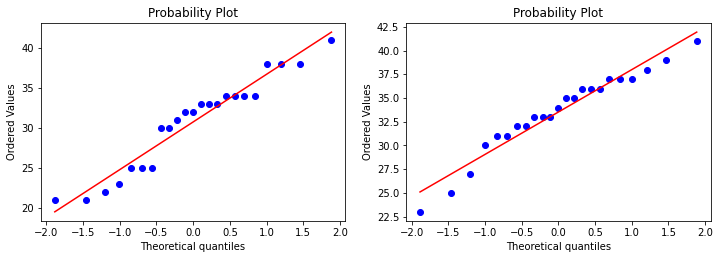

In [7]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(dfSelfControl.Before, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot(dfSelfControl.After, dist="norm", plot=pylab)
pylab.show()

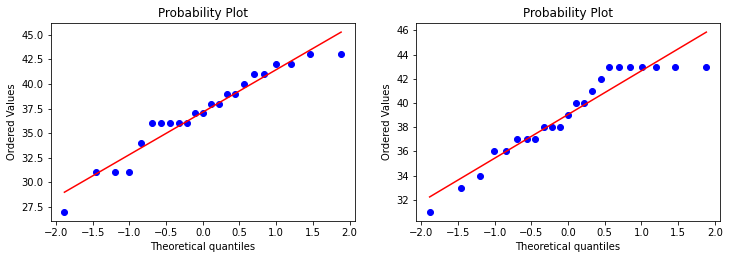

In [8]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(dfAdaptability.Before, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot(dfAdaptability.After, dist="norm", plot=pylab)
pylab.show()

Видно, что распределение признаков `Adaptability` и `SelfControl` близко к нормальному

### Критерий Шапиро-Уилка

In [9]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(dfSelfControl.Before))

Shapiro-Wilk normality test, W-statistic: 0.930578, p-value: 0.112555


In [10]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(dfSelfControl.After))

Shapiro-Wilk normality test, W-statistic: 0.951829, p-value: 0.319207


Из оценки критерия Шапиро-Уилка видно, что наша гипотеза **$H_0$** подтвердилась для признака `SelfControl`

In [11]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(dfAdaptability.Before))

Shapiro-Wilk normality test, W-statistic: 0.940550, p-value: 0.184665


In [12]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(dfAdaptability.After))

Shapiro-Wilk normality test, W-statistic: 0.904539, p-value: 0.031391


Из оценки критерия Шапиро-Уилка видно, что наша гипотеза **$H_0$** подтвердилась для признака `Adaptability`

#### Выводы

Следовательно, из всех этих методов видно, что распределение признаков является нормальным.

### Метод на основе ассиметрии и эксцесса

**Функция для оценки ассиметрии**

$$As_{sd}=3\sqrt{\frac{6(N-1)}{(N+1)(N+3)}}$$

In [13]:
def asymmetry(n: int):
    return 3 * np.sqrt((6*(n-1))/((n+1)*(n+3)))

**Функция для оценки эксцесса**

$$Ex_{sd}=5\sqrt{\frac{24N(N-2)(N-3)}{(N+1)^2(N+3)(N+5)}}$$

In [14]:
def excess(n: int):
    return 5 * np.sqrt((24*n*(n-2)*(n-3))/(((n+1)**2)*(n+3)*(n+5)))

$\frac{|As|}{As_{sd}} > 3 -$ ассиметрия зачима

$\frac{|Ex|}{Ex_{sd}} > 3 -$ эксцесс зачим

**Расчёт для признака `Adaptability`:**

In [15]:
abs(dfAdaptability.skew())/asymmetry(n) > 3

Before    False
After     False
dtype: bool

In [16]:
abs(dfAdaptability.kurt())/excess(n) > 3

Before    False
After     False
dtype: bool

#### Выводы

Таким образом, ассиметрия и эксцесс у нас не считаются значимыми для признака `Adaptability`.

**Расчёт для признака `SelfControl`:**

In [17]:
abs(dfSelfControl.skew())/asymmetry(n) > 3

Before    False
After     False
dtype: bool

In [18]:
abs(dfAdaptability.kurt())/excess(n) > 3

Before    False
After     False
dtype: bool

#### Выводы

Таким образом, ассиметрия и эксцесс у нас не считаются значимыми для признака `SelfControl`.

## Проверка гипотезы о независимости метрических признаков (корреляция Пирсона)

### Данные

*Источник:* https://www.kaggle.com/mastmustu/weather-analysis

*Название:* **weather analysis**

#### Описание данных

Данные содержат суточные погодные атрибуты с 2009 по июль 2020 года в EstesPark

#### Поля

* Date
* Average temperature (°F)
* Average humidity (%)
* Average dewpoint (°F)
* Average barometer (in)
* Average windspeed (mph)
* Average gustspeed (mph)
* Average direction (°deg)
* Rainfall for month (in)
* Rainfall for year (in)
* Maximum rain per minute
* Maximum temperature (°F)
* Minimum temperature (°F)
* Maximum humidity (%)
* Minimum humidity (%)
* Maximum pressure
* Minimum pressure
* Maximum windspeed (mph)
* Maximum gust speed (mph)
* Maximum heat index (°F)

In [19]:
dfWeather = pd.read_csv("./data/climate_data.csv")

In [20]:
dfWeather.head()

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,...,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,...,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,...,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,...,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,...,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665


In [21]:
dfWeather.corr(method='pearson')

,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),Maximum rain per minute,...,Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Month,diff_pressure
Average temperature (°F),1.000000,-0.258103,0.764830,-0.550897,-0.167162,0.000737,0.034183,0.299229,0.203111,NaN,...,0.919248,0.068721,-0.413121,-0.618515,-0.226331,-0.031998,0.020571,0.957647,0.215285,-0.140937
Average humidity (%),-0.258103,1.000000,0.404557,0.178934,-0.516141,-0.197759,-0.315470,0.227414,0.006378,NaN,...,-0.170000,0.696767,0.811699,0.180387,0.079000,-0.317888,-0.117353,-0.204776,-0.012851,0.026704
Average dewpoint (°F),0.764830,0.404557,1.000000,-0.403144,-0.455355,-0.112658,-0.156349,0.429974,0.194450,NaN,...,0.762414,0.515906,0.135565,-0.472044,-0.159177,-0.219546,-0.052015,0.754469,0.187948,-0.122589
Average barometer (in),-0.550897,0.178934,-0.403144,1.000000,-0.121518,-0.062563,-0.143962,-0.128451,0.013939,NaN,...,-0.581604,-0.029233,0.207718,0.936146,0.577095,-0.123866,-0.033694,-0.454612,-0.030326,-0.046655
Average windspeed (mph),-0.167162,-0.516141,-0.455355,-0.121518,1.000000,0.393666,0.291648,-0.209548,-0.106904,NaN,...,-0.056171,-0.542426,-0.243742,-0.100236,-0.087341,0.552315,0.250276,-0.286377,-0.124739,0.033316
Average gustspeed (mph),0.000737,-0.197759,-0.112658,-0.062563,0.393666,1.000000,0.076630,-0.057578,0.007168,NaN,...,0.032247,-0.189880,-0.102480,-0.043760,-0.048651,0.279575,0.659144,-0.044399,-0.015048,0.026207
Average direction (°deg),0.034183,-0.315470,-0.156349,-0.143962,0.291648,0.076630,1.000000,-0.045220,-0.049204,NaN,...,0.033013,-0.201194,-0.275495,-0.144063,-0.103944,0.217027,0.056556,-0.004099,-0.061046,0.023956
Rainfall for month (in),0.299229,0.227414,0.429974,-0.128451,-0.209548,-0.057578,-0.045220,1.000000,0.116040,NaN,...,0.299055,0.277425,0.107240,-0.166775,-0.030838,-0.123329,-0.052883,0.293713,0.025855,-0.071466
Rainfall for year (in),0.203111,0.006378,0.194450,0.013939,-0.106904,0.007168,-0.049204,0.116040,1.000000,NaN,...,0.193721,0.105984,-0.027618,-0.000620,0.047042,-0.013841,0.070547,0.207398,0.912328,-0.052537
Maximum rain per minute,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Можно заметить, что у нас имеется корреляция между признаками:
* `Average temperature (°F)` и `Average dewpoint (°F)`
* `Average temperature (°F)` и `Maximum heat index (°F)`
* `Average dewpoint (°F)` и `Maximum heat index (°F)`

И многие другие, но если исходить из здравого смысла, то большинство остальных зависимостей можно объяснить тем, что у нас в данных представлены \`минимальные\`, \`средние\` и \`максимальные\` значения показателей и естесетвенно между ними будет корреляция

#### Гипотеза

$H_0$ $-$ параметры `Average temperature (°F)` и `Average dewpoint (°F)` независимы

$H_1$ $-$ параметры `Average temperature (°F)` и `Average dewpoint (°F)` зависимы

In [22]:
print("Pearson correlation test, Pearson’s correlation coefficient: %f, p-value: %f" % stats.pearsonr(dfWeather['Average temperature (°F)'], dfWeather['Average dewpoint (°F)']))

Pearson correlation test, Pearson’s correlation coefficient: 0.764830, p-value: 0.000000


Следовательно, гипотеза $H_0$ отвергается и мы отдаём предпочтение гипотизе $H_1$

#### Выводы

Следовательно, признаки `Average temperature (°F)` и `Average dewpoint (°F)` являются зависимыми.

## Проверка гипотезы о независимости ранговых признаков (корреляции Спирмена, Кендалла)

### Данные

*Источник:* https://www.kaggle.com/pawelswider/chess-tournaments-data-set/version/1

*Название:* **Chess Tournaments Data Set**

#### Описание данных

Данные с турнира по шахматам

In [23]:
dfChessTournament = pd.read_csv("./data/ChessData.csv")

In [24]:
dfChessTournament.head()

,TournamentID,Place,StartingPosition,PlayerID,Ranking,Points,TB1,TB2,RankingChange
0,5,1,16,0,2026,7.5,39.5,49.5,2.43
1,5,2,14,1,2031,7.0,38.5,48.5,1.25
2,5,3,20,2,2012,7.0,31.5,41.5,1.04
3,5,4,7,3,2062,6.5,42.0,54.0,0.81
4,5,5,23,4,2004,6.5,41.5,53.5,1.70


In [25]:
dfChessTournament.corr(method='kendall')

,TournamentID,Place,StartingPosition,PlayerID,Ranking,Points,TB1,TB2,RankingChange
TournamentID,1.000000,0.088003,0.050134,-0.554462,0.001021,-0.154593,-0.064695,-0.062071,-0.030051
Place,0.088003,1.000000,0.368761,0.176043,-0.352304,-0.960782,-0.551328,-0.539373,-0.328468
StartingPosition,0.050134,0.368761,1.000000,0.024985,-0.830518,-0.471707,-0.261003,-0.255189,0.217739
PlayerID,-0.554462,0.176043,0.024985,1.000000,-0.070964,-0.294735,-0.163942,-0.150402,-0.116177
Ranking,0.001021,-0.352304,-0.830518,-0.070964,1.000000,0.268474,0.217338,0.222787,-0.213329
Points,-0.154593,-0.960782,-0.471707,-0.294735,0.268474,1.000000,0.429282,0.429227,0.322381
TB1,-0.064695,-0.551328,-0.261003,-0.163942,0.217338,0.429282,1.000000,0.887868,0.335338
TB2,-0.062071,-0.539373,-0.255189,-0.150402,0.222787,0.429227,0.887868,1.000000,0.337306
RankingChange,-0.030051,-0.328468,0.217739,-0.116177,-0.213329,0.322381,0.335338,0.337306,1.000000


In [26]:
dfChessTournament.corr(method='spearman')

,TournamentID,Place,StartingPosition,PlayerID,Ranking,Points,TB1,TB2,RankingChange
TournamentID,1.000000,0.059438,0.059438,-0.763340,0.036966,0.001712,0.004485,-0.005240,0.002407
Place,0.059438,1.000000,0.530357,0.191890,-0.501531,-0.980195,-0.708406,-0.703873,-0.478237
StartingPosition,0.059438,0.530357,1.000000,0.033347,-0.945827,-0.524074,-0.337175,-0.334790,0.323443
PlayerID,-0.763340,0.191890,0.033347,1.000000,-0.093876,-0.232411,-0.184413,-0.175775,-0.168498
Ranking,0.036966,-0.501531,-0.945827,-0.093876,1.000000,0.532037,0.360176,0.356913,-0.311925
Points,0.001712,-0.980195,-0.524074,-0.232411,0.532037,1.000000,0.638643,0.633260,0.453329
TB1,0.004485,-0.708406,-0.337175,-0.184413,0.360176,0.638643,1.000000,0.990012,0.493594
TB2,-0.005240,-0.703873,-0.334790,-0.175775,0.356913,0.633260,0.990012,1.000000,0.496177
RankingChange,0.002407,-0.478237,0.323443,-0.168498,-0.311925,0.453329,0.493594,0.496177,1.000000


Можно видеть что у нас имеется корреляция между `Place` и `StartingPosition`

### Гипотеза

$H_0$ $-$ параметры `Place` и `StartingPosition` независимы

$H_1$ $-$ параметры `Place` и `StartingPosition` зависимы

In [27]:
print("Kendall correlation test, Kendall’s tau: %f, p-value: %f" % stats.kendalltau(dfChessTournament['Place'], dfChessTournament['StartingPosition']))

Kendall correlation test, Kendall’s tau: 0.379832, p-value: 0.000000


Следовательно, гипотеза $H_0$ отвергается и мы отдаём предпочтение гипотизе $H_1$

#### Выводы

Следовательно, признаки `Place` и `StartingPosition` являются зависимыми.

## Проверка гипотезы о независимости номинативных признаков ($\chi^2$)

### Данные

Подходящих данных для демонтрации данного метода я не нашёл, поэтому я создал свои тестовые данные, которые описывают сколько голосов отдали женщины и мужчины за каждого кандидата.

### Гипотеза

$H_0$ $-$ выбор кандидата связан с полом

$H_1$ $-$ выбор кандидата связан с не полом

In [28]:
candidates = pd.DataFrame(
    [
        [48, 22, 33, 47],
        [35, 36, 42, 27]
    ],
    index=["Male","Female"],
    columns=["Candidate 1","Candidate 2","Candidate 3","Candidate 4"])
candidates

,Candidate 1,Candidate 2,Candidate 3,Candidate 4
Male,48,22,33,47
Female,35,36,42,27


In [29]:
print("Chi square test, chi2: %f, p-value: %f, dof: %f" % stats.chi2_contingency(candidates)[:3])

Chi square test, chi2: 11.569790, p-value: 0.009012, dof: 3.000000


Следовательно, гипотеза $H_0$ отвергается и мы отдаём предпочтение гипотизе $H_1$

#### Выводы

Следовательно, выбор кандидата не связан с полом.

## Проверка гипотезы о равенстве дисперсий (критерий Флингера-Килина, критерий Ливена, F-критерий)

### Данные

Возьмём всё те же данные со студентами

### Критерий Флингера-Килина

#### Гипотеза

$H_0 : \sigma_1 = \sigma_2$

$H_1 : \sigma_1 \neq \sigma_2$

In [30]:
print("Fligner test, statistic: %f, p-value: %f" % stats.fligner(dfSelfControl.After, dfSelfControl.Before))

Fligner test, statistic: 0.833522, p-value: 0.361256


Следовательно, гипотеза $H_0$ отвергается и мы отдаём предпочтение гипотизе $H_1$

### Критерий Ливена

#### Гипотеза

$H_0 : \sigma_1 = \sigma_2$

$H_1 : \sigma_1 \neq \sigma_2$

In [31]:
print("Levene test, statistic: %f, p-value: %f" % stats.levene(dfSelfControl.After, dfSelfControl.Before))

Levene test, statistic: 1.572575, p-value: 0.216455


Следовательно, гипотеза $H_0$ отвергается и мы отдаём предпочтение гипотизе $H_1$

### F-критерий

#### Гипотеза

$H_0 : \sigma_1 = \sigma_2$

$H_1 : \sigma_1 \neq \sigma_2$

In [32]:
print("F test, statistic: %f, p-value: %f" % stats.f_oneway(dfSelfControl.After, dfSelfControl.Before))

F test, statistic: 3.342433, p-value: 0.074299


Следовательно, гипотеза $H_0$ отвергается и мы отдаём предпочтение гипотизе $H_1$

#### Выводы

Следовательно, дисперсия признака развитости самоконтроля у студентов-медиков до прохождения курсов гуманитарных наук не равна дисперсии после прохождения этих курсов. Это может свидетельствовать о том, что курсы работают.

## Критерий согласия Стьюдента (одновыборочный)

Исходя из того, что способность адаптироваться измеряется по шкале [0, 100], можно предположить, что при хорошей калибровке теста средняя способоность к адаптированию студентов составляет 50. Тогда для того, чтобы проверить гипотезу о том, что студенты в выборке действительно в среднем хуже адаптируются и им нужно развивать этот навых, давайте проверим, что их адаптивность отличается от средней (не равна 50). 

$H_0$  $-$ среднее значение способности к подавлению испульсивных поведенческих реакций равно 50

$H_1$  $-$ не равно

In [33]:
stats.ttest_1samp(dfAdaptability.Before, 50.0)

Ttest_1sampResult(statistic=-14.573229621309633, pvalue=8.767701148820637e-13)

In [34]:
print("95%% confidence interval: [%f, %f]" % zconfint(dfAdaptability.Before))

95% confidence interval: [35.399598, 38.861272]


Следовательно, гипотеза $H_0$ отвергается и мы отдаём предпочтение гипотизе $H_1$

Значения колеблятся в промежутке: [35.399598, 38.861272]

#### Выводы

Следовательно, способность адаптироваться у студентов до прохождения курсов колеблется в промежутке: [35.399598, 38.861272].

## Проверка гипотезы о равенстве средних значений для независимых выборок (двухвыборочный критерий Стьюдента для независимых выборок)

Ранее мы уже определили, что наши распределения в выборках существенно не отличаются от нормальных.

Мы можем сравнить студентов, которые обучались гуманитарным наукам и студентов, которые не обучались гуманитарным наукам.

Показатели студентов после обучения гуманитрным наукам:

In [35]:
dfAfter.head()

,Adaptability,SelfControl,SelfSufficiency,Optimism,Persistence
0,37,33,41,34,41
1,43,36,30,38,34
2,38,23,42,47,35
3,37,41,38,45,34
4,31,31,26,30,36


Показатели студентов не обучающихся гумантирным наукам:

In [36]:
dfCtrlAfter = pd.read_excel('./data/data.xlsx', sheet_name="ResilienceCtrlGrpAfter")

In [37]:
dfCtrlAfter.head()

,Adaptability,SelfControl,SelfSufficiency,Optimism,Persistence
0,35,27,35,41,33
1,37,29,32,40,32
2,39,32,28,40,38
3,36,44,35,43,42
4,48,41,28,45,37


Объединяем данные:

In [38]:
dfGroups = pd.DataFrame({"Pass": dfAfter[:15]["Adaptability"], "No": dfCtrlAfter["Adaptability"]})

In [39]:
dfGroups.head()

,Pass,No
0,37,35
1,43,37
2,38,39
3,37,36
4,31,48


### Гипотеза

$H_0$ $-$ средние значения развитости адаптивности одинаковы для студентов, прошедших курсы гуманитарных наук, и для студентов не прошедших

$H_1$ $-$ не одинаковы

In [40]:
stats.ttest_ind(dfGroups.Pass, dfGroups.No, equal_var = False)

Ttest_indResult(statistic=1.8455494118497473, pvalue=0.07631491381245319)

In [41]:
cm = CompareMeans(DescrStatsW(dfGroups.No), DescrStatsW(dfGroups.Pass))
print("95%% confidence interval: [%f, %f]" % cm.tconfint_diff(usevar='unequal'))

95% confidence interval: [-6.058668, 0.325334]


Следовательно, гипотеза $H_0$ отвергается и мы отдаём предпочтение гипотизе $H_1$

#### Выводы

Следовательно, средние значения развитости адаптивности не одинаковы для студентов, прошедших курсы гуманитарных наук, и для студентов не прошедших.

## Проверка гипотезы о равенстве средних значений для зависимых выборок (двухвыборочный критерий Стьюдента для зависимых выборок)

Для того, чтобы использовать критерй Стьюдента для связанных выборок, давайте проверим, что распределение попарных разностей существенно не отличается от нормального.

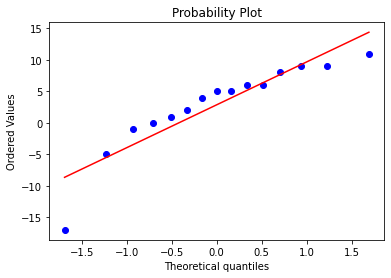

In [42]:
stats.probplot(dfGroups.Pass - dfGroups.No, dist = "norm", plot = pylab)
pylab.show()

### Гипотеза

$H_0$ $-$ средние значения развитости адаптивности одинаковы для студентов, прошедших курсы гуманитарных наук, и для студентов не прошедших

$H_1$ $-$ не одинаковы

In [43]:
stats.ttest_rel(dfGroups.Pass, dfGroups.No)

Ttest_relResult(statistic=1.591034434903623, pvalue=0.13392293097334257)

In [44]:
print("95%% confidence interval: [%f, %f]" % DescrStatsW(dfGroups.Pass - dfGroups.No).tconfint_mean())

95% confidence interval: [-0.997730, 6.731064]


Следовательно, гипотеза $H_0$ отвергается и мы отдаём предпочтение гипотизе $H_1$

#### Выводы

Следовательно, средние значения развитости адаптивности не одинаковы для студентов, прошедших курсы гуманитарных наук, и для студентов не прошедших.

## Проверка гипотезы о равенстве медиан для независимых выборок (ранговый критерий Манна-Уитни, перестановочный критерий)

### Данные

*Источник:* https://fred.stlouisfed.org/series/COSTHPI

*Название:* **All-Transactions House Price Index for Colorado**

#### Описание данных

Данные показывают индекс цен на дома в Колорадо 

In [45]:
dfPrice = pd.read_csv("./data/Price.csv")

In [46]:
dfPrice.head()

,DATE,COSTHPI
0,1975-01-01,54.35
1,1975-04-01,54.63
2,1975-07-01,54.71
3,1975-10-01,54.82
4,1976-01-01,54.82


In [47]:
dfPrice["Year"] = [int(d[:4]) for d in dfPrice["DATE"]]

In [48]:
dfPrice.head()

,DATE,COSTHPI,Year
0,1975-01-01,54.35,1975
1,1975-04-01,54.63,1975
2,1975-07-01,54.71,1975
3,1975-10-01,54.82,1975
4,1976-01-01,54.82,1976


In [49]:
priceOld = dfPrice[(dfPrice['Year'] > 1974) & (dfPrice['Year'] < 1986)].COSTHPI
priceNew = dfPrice[(dfPrice['Year'] > 1999) & (dfPrice['Year'] < 2011)].COSTHPI

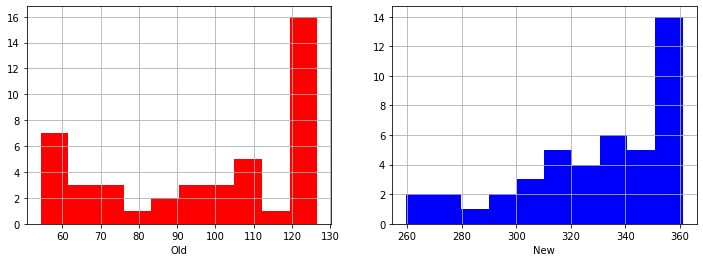

In [50]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(priceOld, color='r')
pylab.xlabel('Old')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(priceNew, color='b')
pylab.xlabel('New')

pylab.show()

### Ранговый критерий Манна-Уитни

#### Гипотиза

$H_0: F_{X_1}(x) = F_{X_2}(x)$

$H_1: F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [51]:
stats.mannwhitneyu(priceOld, priceNew)

MannwhitneyuResult(statistic=0.0, pvalue=6.791891354751343e-16)

Следовательно, гипотеза $H_0$ отвергается и мы отдаём предпочтение гипотизе $H_1$

### Перестановочный критерий

#### Гипотиза

$H_0: F_{X_1}(x) = F_{X_2}(x)$

$H_1: F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [52]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [53]:
def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [54]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), list(filter(lambda i: i not in index, range(n)))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

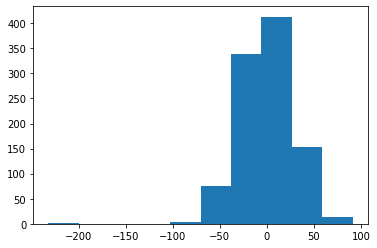

In [55]:
pylab.hist(permutation_zero_dist_ind(priceOld, priceNew, max_combinations = 1000))
pylab.show()

In [56]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [57]:
print("p-value: %f" % permutation_test(priceOld, priceNew, max_permutations = 10000))

p-value: 0.000100


In [58]:
print("p-value: %f" % permutation_test(priceOld, priceNew, max_permutations = 50000))

p-value: 0.000020


Следовательно, гипотеза $H_0$ отвергается и мы отдаём предпочтение гипотизе $H_1$

## Проверка гипотезы о равенстве медиан для зависимых выборок (критерий знаковых рангов Уилкоксона, критерий знаков, перестановочный критерий)

### Данные

Возьмём данные со студентами

Посмотрим на данные

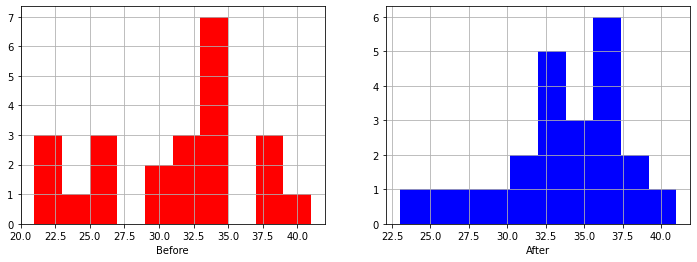

In [59]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(dfSelfControl.Before, color = 'r')
pylab.xlabel('Before')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(dfSelfControl.After, color = 'b')
pylab.xlabel('After')

pylab.show()

In [60]:
dfSelfControl.describe()

,Before,After
count,23.000000,23.000000
mean,30.739130,33.521739
std,5.840434,4.378351
min,21.000000,23.000000
25%,25.000000,31.500000
50%,32.000000,34.000000
75%,34.000000,36.500000
max,41.000000,41.000000


### Критерий знаковых рангов Уилкоксона

$H_0\colon med\left(X_1-X_2\right)=0,$

$H_1\colon med\left(X_1-X_2\right)\neq0$

In [61]:
stats.wilcoxon(dfSelfControl.After, dfSelfControl.Before)

/home/egor/.local/lib/python3.9/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=9.0, pvalue=0.0013453915627658364)

In [62]:
stats.wilcoxon(dfSelfControl.After - dfSelfControl.Before)

WilcoxonResult(statistic=9.0, pvalue=0.0013453915627658364)

Следовательно, гипотеза $H_0$ отвергается и мы отдаём предпочтение гипотизе $H_1$

### Критерий знаков

$H_0\colon P\left(X_1>X_2\right)=\frac1{2},$

$H_1\colon P\left(X_1>X_2\right)\neq\frac1{2}$

In [63]:
print("M: %d, p-value: %f" % sign_test(dfSelfControl.After - dfSelfControl.Before))

M: 5, p-value: 0.012726


Следовательно, гипотеза $H_0$ отвергается и мы отдаём предпочтение гипотизе $H_1$

### Перестановочный критерий

$H_0: \mathbb{E}(X_1 - X_2) = 0$

$H_1: \mathbb{E}(X_1 - X_2) \neq 0$

In [64]:
def permutation_t_stat_1sample(sample, mean):
    t_stat = sum(list(map(lambda x: x - mean, sample)))
    return t_stat

In [65]:
def permutation_zero_distr_1sample(sample, mean, max_permutations = None):
    centered_sample = list(map(lambda x: x - mean, sample))
    if max_permutations:
        signs_array = set([tuple(x) for x in 2 * np.random.randint(2, size = (max_permutations, 
                                                                              len(sample))) - 1 ])
    else:
        signs_array =  itertools.product([-1, 1], repeat = len(sample))
    distr = [sum(centered_sample * np.array(signs)) for signs in signs_array]
    return distr

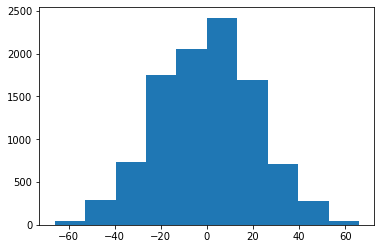

In [66]:
pylab.hist(permutation_zero_distr_1sample(dfSelfControl.After - dfSelfControl.Before, 0., 
                               max_permutations = 10000))
pylab.show()

In [67]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_1sample(sample, mean)
    
    zero_distr = permutation_zero_distr_1sample(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [68]:
print("p-value: %f" % permutation_test(dfSelfControl.After - dfSelfControl.Before, 0., 
                               max_permutations = 1000))

p-value: 0.002000


In [69]:
print("p-value: %f" % permutation_test(dfSelfControl.After - dfSelfControl.Before, 0., 
                               max_permutations = 50000))

p-value: 0.000602


Следовательно, гипотеза $H_0$ отвергается и мы отдаём предпочтение гипотизе $H_1$